# Bilbiotecas

---

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn import tree
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve

from sklearn.metrics import RocCurveDisplay


# Constantes

---

In [37]:
DATAPATH = 'data/1_telecom_customer_churn.csv'
SEED = 42

---

In [38]:
data = pd.read_csv(DATAPATH)

In [39]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4475,4693-VWVBO,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,No
5890,0383-CLDDA,Female,0,No,No,69,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.35,5897.4,No
1516,6198-RTPMF,Female,0,Yes,No,17,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,92.60,1579.7,No
6179,6328-ZPBGN,Female,1,No,No,11,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.15,997.65,Yes
3807,8625-AZYZY,Male,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.65,2542.45,Yes


In [40]:
print(f"nº de clientes {data.shape[0]}")
print(f"nº de features {data.shape[1]-2}, não foi considerado a coluna Church  pois é a variavel target e a variavel CustomerID poi sé um identificador")

nº de clientes 7043
nº de features 19, não foi considerado a coluna Church  pois é a variavel target e a variavel CustomerID poi sé um identificador


In [41]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
target_counts = data['Churn'].value_counts()
target_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

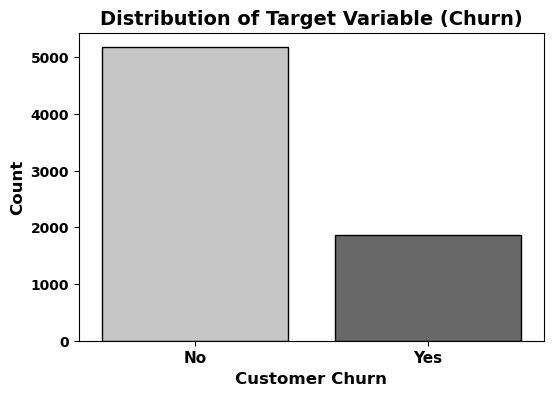

In [45]:
# Criar a gráfico
plt.figure(figsize=(6, 4))

# Criar gráfico de barras com Seaborn 
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Greys", edgecolor="black",hue=target_counts.index)

# Definir rótulos e título
plt.xlabel("Customer Churn", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Target Variable (Churn)", fontsize=14, fontweight="bold")

# Melhorar a legibilidade dos rótulos do eixo X
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], fontsize=11)

# Exibir o gráfico
plt.show()

O facto das classes target estarem desbalanceadas, é um indicador a ter cuidado na escolha das métricas de avaliação dos modelos de previsão.

In [46]:
collumns_to_drop = ['customerID','TotalCharges']

In [47]:
# Selecionar colunas categóricas
categorical_cols = data.select_dtypes(include=["object"]).columns

categorical_cols = [col for col in categorical_cols if col not in collumns_to_drop]

In [48]:
# Contar valores únicos para cada variável categórica
unique_values_counts = {col: data[col].nunique() for col in categorical_cols}

# Criar DataFrame para exibição
categorical_df = pd.DataFrame(list(unique_values_counts.items()), columns=["Categorical Feature", "Unique Values"])

categorical_df 

,Categorical Feature,Unique Values
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3


In [49]:
# Criar um dicionário com os valores únicos de cada variável categórica
unique_values_dict = {col: data[col].unique().tolist() for col in categorical_cols}

# Criar um DataFrame com os valores apurados em cima
unique_cat_values_df = pd.DataFrame([(col, val) for col, values in unique_values_dict.items() for val in values],
                                columns=["Feature", "Unique Values"])

unique_cat_values_df

,Feature,Unique Values
0,gender,Female
1,gender,Male
2,Partner,Yes
3,Partner,No
4,Dependents,No
5,Dependents,Yes
6,PhoneService,No
7,PhoneService,Yes
8,MultipleLines,No phone service
9,MultipleLines,No


In [50]:
df_categorical_preprocessed = data.select_dtypes(include=["object"]).copy()
df_categorical_preprocessed = df_categorical_preprocessed.drop(columns=collumns_to_drop)
df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [51]:
def preprocess_binary_cols_num(df, cols):
    """
    Função para transformar várias variáveis booleanas (com 'Yes'/'No') em numéricas (1/0).

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo as colunas a serem transformadas.
    - cols (list of str): Lista com os nomes das colunas a serem transformadas.

    Retorna:
    - pd.DataFrame: DataFrame com as colunas transformadas.
    """

    for col in cols:
        if col in df.columns:
            df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

    return df


Conversão Variaveis Categoricas em Variaveis Numericas 

In [52]:
collumns_to_convert = ['Partner', 'Dependents', 'PhoneService','Churn']
data_binarycollumns = preprocess_binary_cols_num(df_categorical_preprocessed, collumns_to_convert)

# Concatenar o resultado ao DataFrame original
df_categorical_preprocessed.update(data_binarycollumns)


In [53]:
df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,1,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7039,Female,1,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7040,Female,1,1,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
7041,Male,1,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [54]:
# Aplicar Ordinal Encoding em 'contract order' conforme a ordem especificada
contract_order = ["Month-to-month","One year","Two year"]
ordinal_encoder = OrdinalEncoder(categories=[contract_order], handle_unknown="use_encoded_value", unknown_value=-1)
df_categorical_preprocessed["Contract"] = ordinal_encoder.fit_transform(df_categorical_preprocessed[["Contract"]])

df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,0.0,Yes,Electronic check,0
1,Male,0,0,1,No,DSL,Yes,No,Yes,No,No,No,1.0,No,Mailed check,0
2,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No,0.0,Yes,Mailed check,1
3,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1.0,No,Bank transfer (automatic),0
4,Female,0,0,1,No,Fiber optic,No,No,No,No,No,No,0.0,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,1,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1.0,Yes,Mailed check,0
7039,Female,1,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1.0,Yes,Credit card (automatic),0
7040,Female,1,1,0,No phone service,DSL,Yes,No,No,No,No,No,0.0,Yes,Electronic check,0
7041,Male,1,0,1,Yes,Fiber optic,No,No,No,No,No,No,0.0,Yes,Mailed check,1


In [55]:
# Inicializar o OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
columns_ohe = ["gender"]

# Ajustar o encoder e transformar os dados
one_hot_encoded = ohe.fit_transform(df_categorical_preprocessed[columns_ohe])
one_hot_columns = ohe.get_feature_names_out(columns_ohe)  # Corrigido

# Criar um DataFrame com os resultados do OHE
ohe_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df_categorical_preprocessed.index)

# Concatenar o resultado ao DataFrame original
df_transformed = pd.concat([df_categorical_preprocessed, ohe_df], axis=1)

# Remover a coluna original
df_transformed.drop(columns=columns_ohe, inplace=True)

# Exibir 15 linhas aleatórias do DataFrame atualizado para verificar o resultado
df_transformed.sample(15)

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
6126,0,0,1,No,Fiber optic,No,No,Yes,No,Yes,Yes,0.0,Yes,Credit card (automatic),1,0.0,1.0
6128,1,0,1,No,Fiber optic,No,No,No,No,No,Yes,0.0,Yes,Electronic check,0,1.0,0.0
984,1,1,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2.0,No,Bank transfer (automatic),0,1.0,0.0
1327,1,0,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,1.0,Yes,Bank transfer (automatic),1,0.0,1.0
3837,0,0,1,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,1.0,Yes,Electronic check,1,1.0,0.0
1413,1,1,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,2.0,No,Credit card (automatic),0,0.0,1.0
4672,0,1,1,No,DSL,No,No,No,No,No,No,0.0,No,Mailed check,0,0.0,1.0
5576,0,0,1,No,DSL,No,No,No,No,Yes,No,0.0,Yes,Mailed check,1,1.0,0.0
294,0,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.0,No,Mailed check,0,1.0,0.0
3570,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2.0,No,Mailed check,0,0.0,1.0


In [56]:
# Aplicar Label Encoding nas restantes variáveis categóricas
label_encoders = {}
for col in df_transformed.select_dtypes(include=["object"]).columns:
      le = LabelEncoder()
      df_transformed[col] = le.fit_transform(df_transformed[col])
      label_encoders[col] = le

In [57]:
df_transformed

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
0,1,0,0,1,0,0,2,0,0,0,0,0.0,1,2,0,1.0,0.0
1,0,0,1,0,0,2,0,2,0,0,0,1.0,0,3,0,0.0,1.0
2,0,0,1,0,0,2,2,0,0,0,0,0.0,1,3,1,0.0,1.0
3,0,0,0,1,0,2,0,2,2,0,0,1.0,0,0,0,0.0,1.0
4,0,0,1,0,1,0,0,0,0,0,0,0.0,1,2,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,2,0,2,0,2,2,2,2,1.0,1,3,0,0.0,1.0
7039,1,1,1,2,1,0,2,2,0,2,2,1.0,1,1,0,1.0,0.0
7040,1,1,0,1,0,2,0,0,0,0,0,0.0,1,2,0,1.0,0.0
7041,1,0,1,2,1,0,0,0,0,0,0,0.0,1,3,1,0.0,1.0


In [58]:
data.update(df_transformed)
data.drop(columns=['gender','customerID'], inplace=True)

In [59]:
# Converter para float (valores inválidos ficam como NaN)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')


In [60]:
media_por_contrato = data.groupby("Contract")["TotalCharges"].mean()
media_por_contrato

Contract
0.0    1369.254581
1.0    3034.683084
2.0    3728.933947
Name: TotalCharges, dtype: float64

In [61]:
data["TotalCharges"] = data.groupby("Contract")["TotalCharges"].transform(
    lambda x: x.fillna(x.mean())
)

In [62]:
data.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
data.sample(15)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1580,1,1,0,21,1,2,0,0,2,2,0,0,2,1.0,0,0,71.70,1497.05,0
2309,0,0,0,57,1,2,1,0,0,0,2,2,0,2.0,1,1,90.45,5229.80,0
4863,0,1,1,57,1,0,2,1,1,1,1,1,1,2.0,0,3,20.75,1123.15,0
710,0,0,0,1,1,0,2,1,1,1,1,1,1,0.0,0,3,19.55,19.55,1
5738,0,0,0,1,1,0,2,1,1,1,1,1,1,0.0,0,3,20.60,20.60,1
849,0,1,1,72,1,2,0,2,2,2,2,2,2,2.0,0,1,89.80,6510.45,0
6609,0,0,0,1,1,0,2,1,1,1,1,1,1,0.0,1,3,20.10,20.10,1
4028,0,0,0,63,1,0,1,2,2,2,2,2,2,2.0,0,1,109.20,7049.75,0
3354,0,0,0,54,0,1,0,2,0,0,2,0,2,1.0,0,0,44.10,2369.70,0
2230,0,1,1,45,1,0,2,1,1,1,1,1,1,2.0,0,3,20.35,929.20,0


In [64]:
def split_data(df, target_column, test_size=0.2, seed=None,sample_fraction=1):
    """
    Divide os dados em conjuntos de treino e teste, com a opção de reduzir o tamanho do conjunto de treino.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados.
    target_column (str): Nome da coluna alvo (variável dependente).
    test_size (float, opcional): Proporção dos dados a serem usados como teste. Padrão é 0.2 (20%).
    seed (int, opcional): Semente para reprodutibilidade dos dados.
    sample_fraction (float, opcional): Fração do conjunto de treino a ser usada, Padrão é 1 (100%).

    Retorna:
    X_train, X_test, y_train, y_test (DataFrames/Series): Conjuntos de treino e teste.
    """
    # Divisão entre treino e teste
    train_set, test_set = train_test_split(df, test_size=test_size, random_state=seed)

    # Aplicação da amostragem caso seja necessário
    if sample_fraction < 1:
        train_set = train_set.sample(frac=sample_fraction, random_state=seed)

    # Separação das variáveis independentes e dependente
    X_train = train_set.drop(columns=[target_column])
    y_train = train_set[target_column]
    X_test = test_set.drop(columns=[target_column])
    y_test = test_set[target_column]

    return X_train, X_test, y_train, y_test

In [65]:
X_train, X_test, y_train, y_test = split_data(df_transformed, target_column='Churn', test_size=0.2, seed=SEED, sample_fraction=1)

In [66]:
# Criar e treinar o modelo
selected_model = RandomForestClassifier(n_estimators=100, random_state=42)
selected_model.fit(X_train, y_train)

# Calcular a importância das features e o desvio padrão entre as árvores
std = np.std([tree.feature_importances_ for tree in selected_model.estimators_], axis=0)

# Criar o DataFrame com os resultados
random_forest_importances = pd.DataFrame.from_dict({
    "Feature": X_train.columns,
    "Importance": selected_model.feature_importances_,
    "Std": std
}).sort_values(by="Importance", ascending=False)

# Calcular a importância acumulada
random_forest_importances["Cumulative Importance"] = random_forest_importances["Importance"].cumsum() / random_forest_importances["Importance"].sum()

random_forest_importances

,Feature,Importance,Std,Cumulative Importance
11,Contract,0.145317,0.046244,0.145317
13,PaymentMethod,0.135258,0.023619,0.280575
5,OnlineSecurity,0.083705,0.041785,0.364280
8,TechSupport,0.068362,0.034539,0.432643
3,MultipleLines,0.062108,0.010928,0.494750
0,Partner,0.059950,0.014216,0.554700
6,OnlineBackup,0.059300,0.017472,0.614000
7,DeviceProtection,0.055896,0.013753,0.669897
10,StreamingMovies,0.054623,0.012341,0.724520
9,StreamingTV,0.054472,0.011147,0.778992


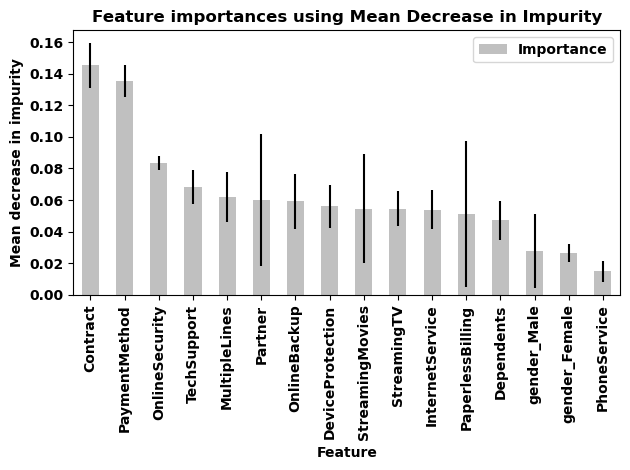

In [67]:
fig, ax = plt.subplots()
random_forest_importances.plot.bar(x="Feature", y="Importance",yerr=std, ax=ax,color="silver")
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [68]:
# Selecionar as 5 features mais importantes
top_features = random_forest_importances["Feature"].head(11).tolist()

# Criar um novo DataFrame com as top 5 features + variável target 'Churn'
df_transformed = df_transformed[top_features + ['Churn']]

<Axes: >

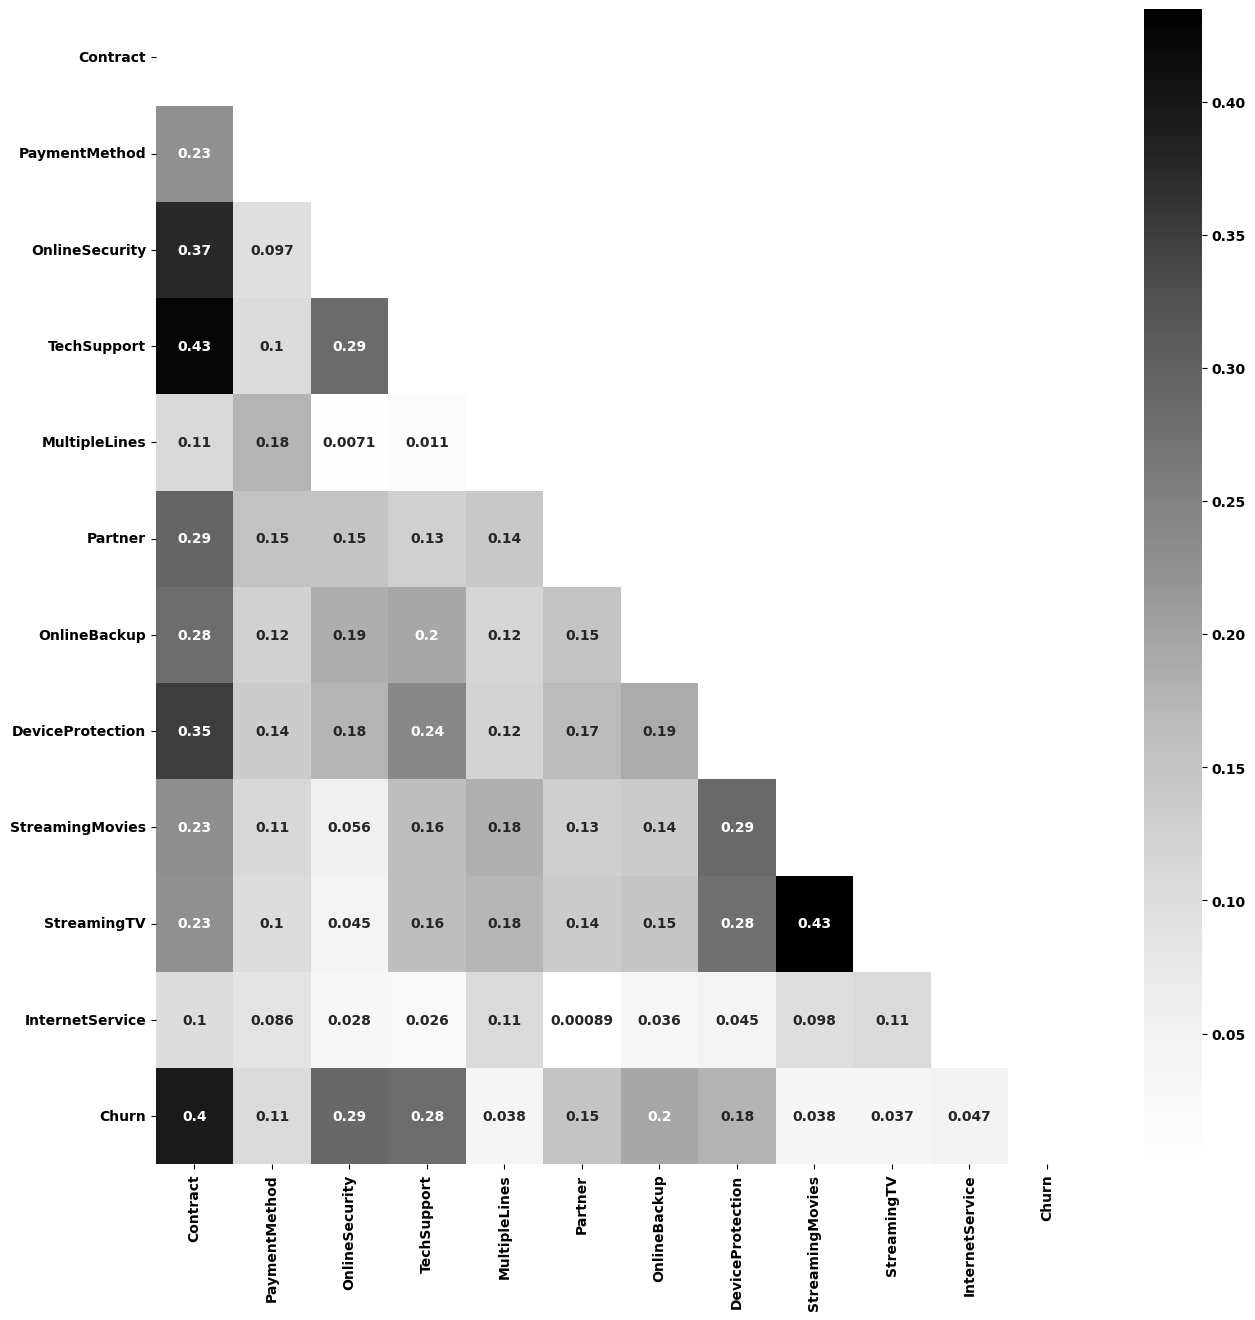

In [69]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_transformed.corr().abs(), annot=True, cmap = "Greys",ax=ax, mask = np.triu(np.ones_like(df_transformed.corr().abs(), dtype=bool)))

In [70]:
X_train, X_test, y_train, y_test = split_data(df_transformed, target_column='Churn', test_size=0.2, seed=SEED, sample_fraction=0.3)

In [71]:
def train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test, cv=5):
    """
    Treina múltiplos modelos usando GridSearchCV, regista o tempo de execução e guarda os melhores resultados.

    Parâmetros:
    - models_and_params: Lista contendo (nome_do_modelo, classificador, hiperparâmetros).
    - X_train: Conjunto de treino (features).
    - y_train: Conjunto de treino (labels).
    - X_test: Conjunto de teste (features).
    - y_test: Conjunto de teste (labels).
    - cv: Número de folds para cross-validation (default = 5).

    Retorna:
    - grid_search_results: Lista com os resultados de GridSearchCV para cada modelo.
    - resource_usage: Lista de dicionários contendo o tempo de treino de cada modelo.
    - grid_search_results_overall: m dicionário com os resultados de todos os modelos e o melhor modelo encontrado.
    """
    grid_search_results = []
    resource_usage = []
    results = []

    best_model_name = None
    best_roc_auc = 0

    for model_str, clf, params in models_and_params:
        print(f"Treinando modelo: {model_str}...")

        # Medir tempo de treino
        start_time = time.time()
        grid_search_result = GridSearchCV(clf, params, cv=cv).fit(X_train, y_train)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Guardar resultado
        grid_search_results.append(grid_search_result)
        resource_usage.append({
            "model": model_str,
            "training_time": elapsed_time
        })

        # Obter o melhor modelo encontrado
        best_estimator = grid_search_result.best_estimator_

        #Se o modelo suporta predict_proba(), ele retorna a probabilidade da classe positiva
        if hasattr(best_estimator, "predict_proba"):
            y_proba = best_estimator.predict_proba(X_test)[:, 1]
        else:
            y_scores = best_estimator.decision_function(X_test)
            y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())  # Normalização

        # Calcular roc_auc
        roc_auc = roc_auc_score(y_test, y_proba)

        # Guardar resultados em lista para DataFrame
        results.append({
            "Modelo": model_str,
            "ROC AUC": round(roc_auc, 4),
            "Tempo de Treino (s)": round(elapsed_time, 2)
        })

        # Verificar se este modelo é o melhor até agora
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_model_name = model_str

        print(f"Modelo {model_str} concluído em {elapsed_time:.2f} segundos. ROC AUC: {roc_auc:.4f}\n")

    # Criar DataFrame com os resultados de todos os modelos
    df_grid_search_results = pd.DataFrame(results)

    # Criar DataFrame para armazenar o melhor modelo
    df_best_model = pd.DataFrame([{
        "model_name": best_model_name,
        "ROC AUC": best_roc_auc
    }])

    # Criar um dicionário contendo os resultados gerais
    grid_search_results_overall = {
        "df_grid_search_results": df_grid_search_results,
        "df_best_model": df_best_model
    }

    return grid_search_results, resource_usage, grid_search_results_overall

In [72]:
def plot_roc_curves(models_and_params, grid_search_results, X_test, y_test):
    """
    Cria Gráfico plot para curva ROC para múltiplos modelos treinados.

    Parâmetros:
    - models_and_params: Lista contendo (nome_do_modelo, classificador, hiperparâmetros).
    - grid_search_results: Lista com os resultados do GridSearchCV para cada modelo.
    - X_test: Conjunto de features de teste.
    - y_test: Labels reais do conjunto de teste.

    Retorna:
    - Exibe um gráfico com as curvas ROC de todos os modelos.
    """
    fig, ax_roc = plt.subplots(1, 1, figsize=(12, 10))

    for i in range(len(models_and_params)):
        RocCurveDisplay.from_estimator(
            grid_search_results[i].best_estimator_,
            X_test,
            y_test,
            ax=ax_roc,
            name=models_and_params[i][0]
        )

    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    ax_roc.grid(linestyle="--")
    plt.legend()
    plt.show()

In [73]:
def plot_training_time(resource_usage):
    """
    Cria gráfico plot com o tempo de treino de cada modelo.

    Parâmetros:
    - resource_usage: Lista de dicionários contendo 'model' e 'training_time'.

    Retorna:
    - Exibe um gráfico de barras mostrando o tempo de treino por modelo.
    """
    # Criar DataFrame com os dados de consumo de recursos
    df_resource_usage = pd.DataFrame(resource_usage)

    # Criar a figura para o gráfico
    plt.figure(figsize=(10, 6))

    # Criar gráfico de barras para o tempo de treino por modelo
    ax = sns.barplot(x="model", y="training_time", data=df_resource_usage, color="grey")

    # Apresentar valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Valor formatado com 2 casas decimais
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição do texto
                    ha='center', va='bottom',  # Alinhamento
                    fontsize=12, color='black', fontweight='bold')  # Estilo do texto

    # Configurar título e rótulos do gráfico
    plt.title("Tempo de Treino por Modelo")
    plt.ylabel("Tempo (segundos)")
    plt.xlabel("Modelo")
    plt.xticks(rotation=45)

    # Exibir o gráfico
    plt.show()

In [74]:
def transform_dict_values(param_dict, fields_to_convert=None):
    """
    Converte valores específicos de um dicionário para listas.
    Se nenhum campo for especificado, converte todos os campos.

    Parâmetros:
    - param_dict: Dicionário contendo os hiperparâmetros.
    - fields_to_convert: Lista de chaves cujos valores devem ser convertidos em listas.
                         Se None, todos os campos serão convertidos.

    Retorna:
    - Um dicionário onde os campos especificados (ou todos) foram convertidos para listas.
    """
    # Criar uma cópia do dicionário para não modificar o original
    updated_dict = param_dict.copy()

    # Se fields_to_convert não for especificado, aplicar a todos os campos
    if fields_to_convert is None:
        fields_to_convert = updated_dict.keys()

    # Converter os campos especificados para listas
    for field in fields_to_convert:
        if field in updated_dict and not isinstance(updated_dict[field], list):
            updated_dict[field] = [updated_dict[field]]

    return updated_dict

In [75]:
def add_prefix_to_keys(dictionary, prefix):
    """
    Adiciona um prefixo a todas as chaves de um dicionário.

    Parâmetros:
    - dictionary: Dicionário original cujas chaves devem ser modificadas.
    - prefix: String a ser adicionada como prefixo às chaves.

    Retorna:
    - Novo dicionário com as chaves modificadas.
    """
    return {f"{prefix}{key}": value for key, value in dictionary.items()}

In [76]:
def get_estimator_config(models_and_params, estimator_name):
    """
    Retorna a configuração completa de um estimador específico, mantendo o formato original do tuplo.

    Parâmetros:
    - models_and_params: Lista de tuplas contendo (nome, modelo ou pipeline, hiperparâmetros).
    - estimator_name: Nome do estimador a ser buscado.

    Retorna:
    - Uma tupla (nome, modelo ou pipeline, hiperparâmetros) se o estimador for encontrado.
    - None se o nome do estimador não existir na lista.
    """
    for config in models_and_params:
        name, model, params = config
        if name == estimator_name:
            return config  # Retorna a tupla completa como está no dataset

    return None  # Retorna None se o estimador não for encontrado

## Find best hiperparameters in SVM

---

In [77]:
models_and_params = [
    (
        'svm',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', SVC(random_state = SEED))
        ]),
        {
          "Classifier__C": [0.1, 1, 10],
          "Classifier__gamma": np.logspace(-9, 3, 10),
          "Classifier__kernel": ["linear"]
        }
    ),

    (
    'svm2',
    Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('Classifier', SVC(random_state=SEED))  # Adicionado probability=True
    ]),
    {
      "Classifier__C": [0.1, 1, 10],
      "Classifier__gamma": np.logspace(-4, 1, 6),  # Valores mais práticos de gamma
      "Classifier__kernel": ["rbf"]
    }
   )

]

In [78]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)


Treinando modelo: svm...
Modelo svm concluído em 4.92 segundos. ROC AUC: 0.7945

Treinando modelo: svm2...
Modelo svm2 concluído em 4.27 segundos. ROC AUC: 0.7974



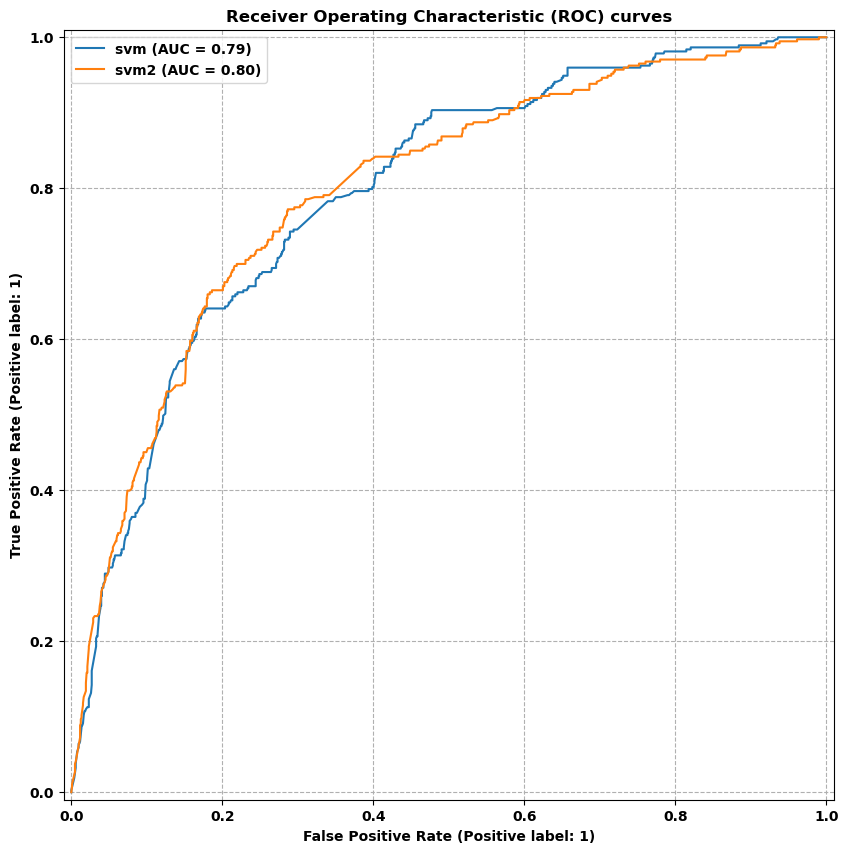

In [79]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

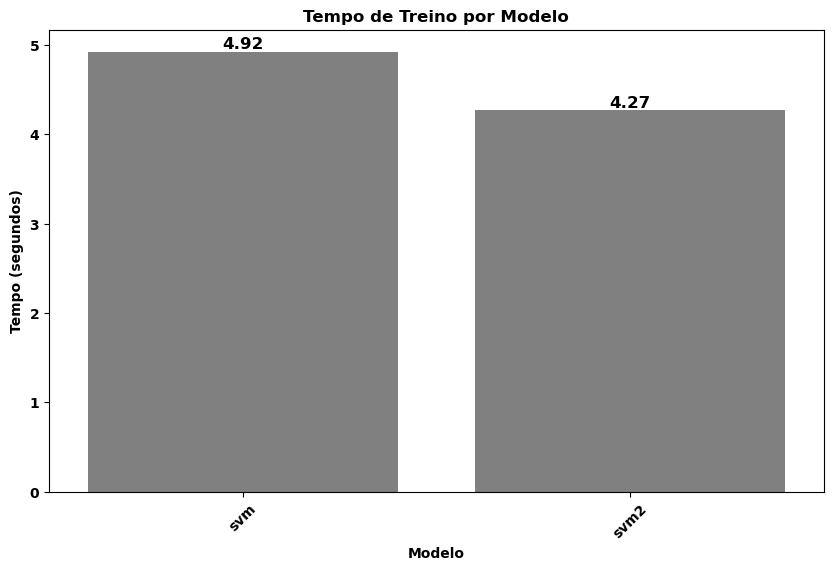

In [80]:
plot_training_time(resource_usage)

In [81]:
svm_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
svm_optimized

('svm2',
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('Classifier', SVC(random_state=42))]),
 {'Classifier__C': [0.1, 1, 10],
  'Classifier__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
  'Classifier__kernel': ['rbf']})

## Find best hiperparameters in Decision Tree

---

In [82]:
models_and_params = [

    (
        'decision_tree',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth':[2, 4, 6,8],
            'min_samples_split': [2, 4, 6, 10],
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    ),

     (
        'decision_tree2',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth': [2, 5, 10, 20, None],  # Testar árvores mais profundas
            'min_samples_split': [2, 4, 6, 10],
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    ),

         (
        'decision_tree3',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth': [2, 5, 10, 20, None],  # Testar árvores mais profundas
            'min_samples_split': [2, 5, 10, 20, 50],  # Evita overfitting
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    ),


             (
        'decision_tree4',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth': [2, 5, 10, 20, None],  # Testar árvores mais profundas
            'min_samples_split': [2, 5, 10, 20, 50],  # Evita overfitting
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1, 4, 10, 20, 50],  # Regularização extra
        }
    ),

        (
        'decision_tree5',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth':[2, 4, 6,8],
            'min_samples_split': [2, 4, 6, 10],
            'criterion': ["gini", "entropy"],  # Testar diferentes critérios
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    )
]

In [83]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: decision_tree...
Modelo decision_tree concluído em 1.68 segundos. ROC AUC: 0.8151

Treinando modelo: decision_tree2...
Modelo decision_tree2 concluído em 2.20 segundos. ROC AUC: 0.8064

Treinando modelo: decision_tree3...
Modelo decision_tree3 concluído em 3.11 segundos. ROC AUC: 0.8099

Treinando modelo: decision_tree4...
Modelo decision_tree4 concluído em 4.85 segundos. ROC AUC: 0.8099

Treinando modelo: decision_tree5...
Modelo decision_tree5 concluído em 3.63 segundos. ROC AUC: 0.8151



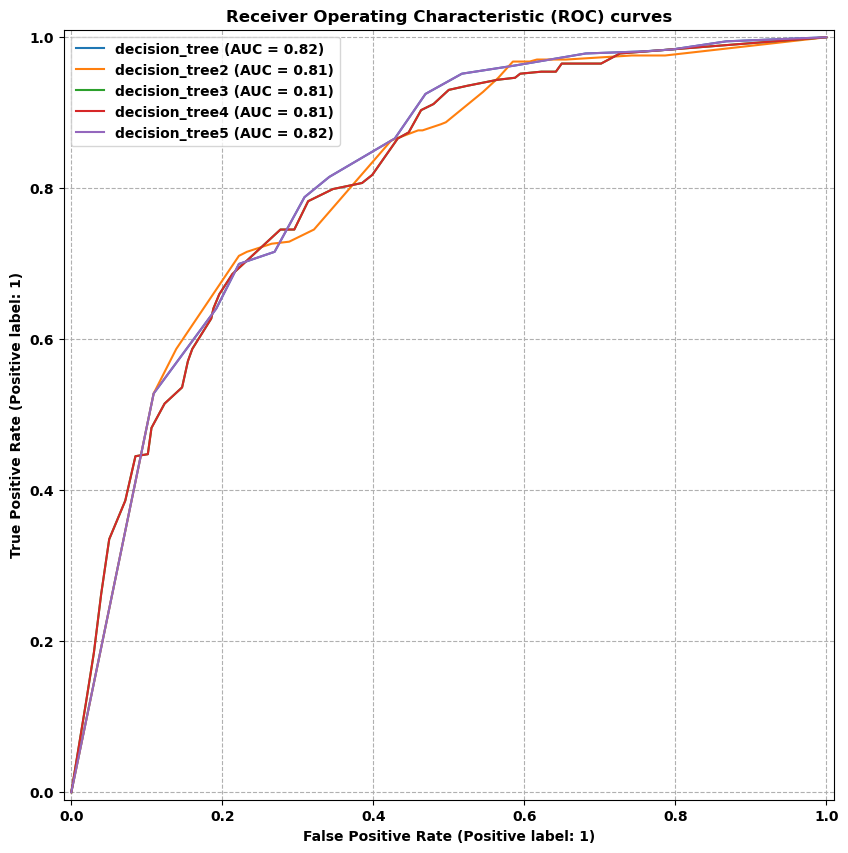

In [84]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

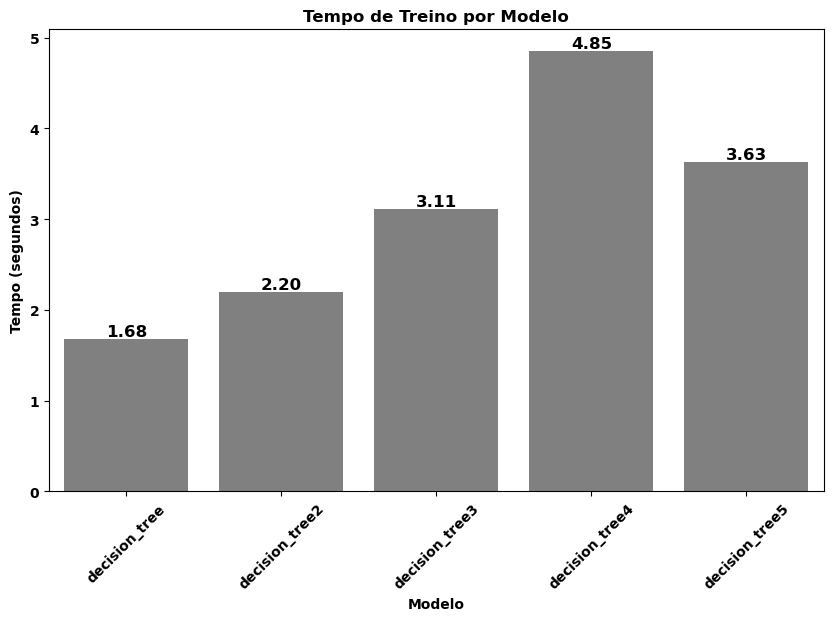

In [85]:
plot_training_time(resource_usage)

In [86]:
decision_tree_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
decision_tree_optimized

('decision_tree',
 DecisionTreeClassifier(random_state=42),
 {'max_depth': [2, 4, 6, 8],
  'min_samples_split': [2, 4, 6, 10],
  'criterion': ['gini'],
  'splitter': ['best', 'random'],
  'min_samples_leaf': [1, 4, 10]})

## Find best hiperparameters in Random Forest

---

In [87]:
models_and_params = [

    (
        'random_forest',
        RandomForestClassifier(random_state = SEED),
        {
            'n_estimators':[10, 100, 300,500],
            'max_depth':[2, 4, 6]
        }
    ),
        (
        'random_forest2',
        RandomForestClassifier(random_state = SEED),
        {
            'n_estimators':[50, 100, 300, 500],
            'max_depth':[5, 10, 20, None]
        }
    )

]

In [88]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: random_forest...
Modelo random_forest concluído em 13.15 segundos. ROC AUC: 0.8368

Treinando modelo: random_forest2...
Modelo random_forest2 concluído em 22.38 segundos. ROC AUC: 0.8360



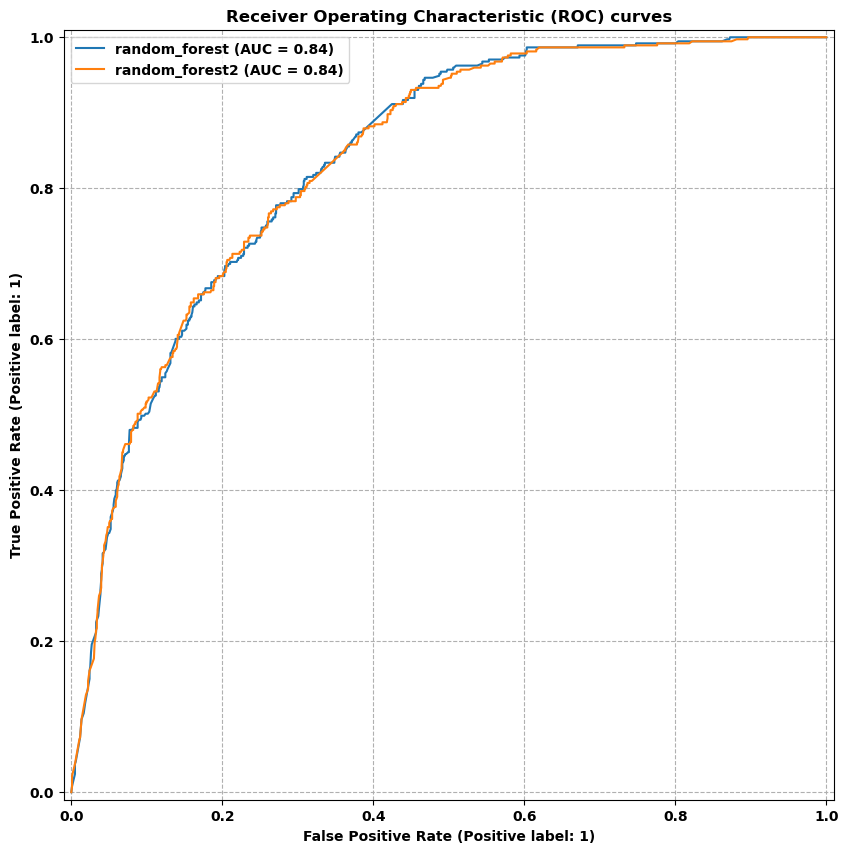

In [89]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

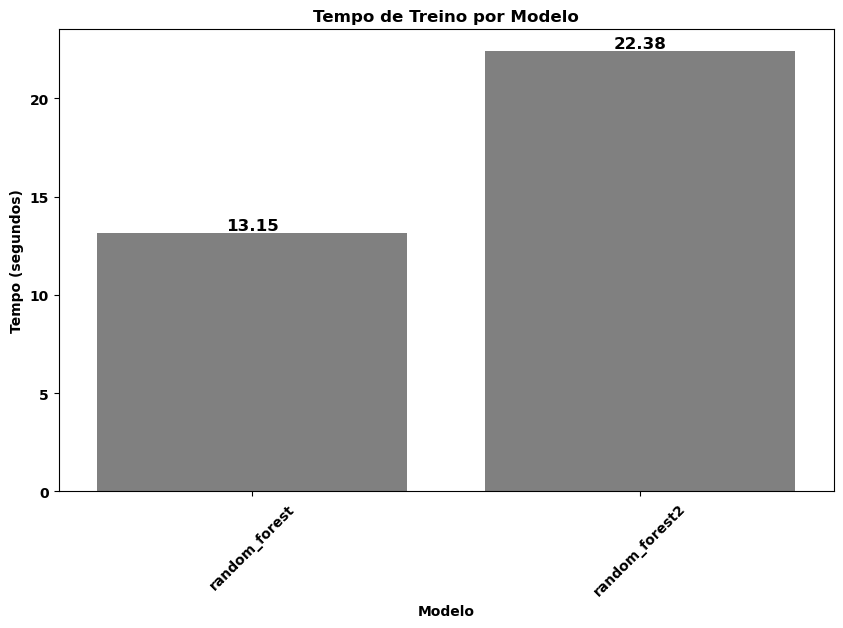

In [90]:
plot_training_time(resource_usage)

In [91]:
random_forest_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
random_forest_optimized

('random_forest',
 RandomForestClassifier(random_state=42),
 {'n_estimators': [10, 100, 300, 500], 'max_depth': [2, 4, 6]})

## Find best hiperparameters in KNN

---

In [92]:
models_and_params = [

    (
        'knn',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', KNeighborsClassifier())
        ]),
        {
          "Classifier__n_neighbors": [1,10,100]
        }
    ),

        (
        'knn2',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', KNeighborsClassifier())
        ]),
        {
          "Classifier__n_neighbors":[3, 5, 10, 20, 50],
           "Classifier__weights": ["distance"]
        }
    ),

        (
        'knn3',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', KNeighborsClassifier())
        ]),
        {
          "Classifier__n_neighbors":[3, 5, 10, 20, 50],
           "Classifier__weights": ["uniform", "distance"],
          "Classifier__metric": ["euclidean", "manhattan", "minkowski"]
        }
    )
]

In [93]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: knn...
Modelo knn concluído em 0.28 segundos. ROC AUC: 0.8099

Treinando modelo: knn2...
Modelo knn2 concluído em 0.26 segundos. ROC AUC: 0.7534

Treinando modelo: knn3...
Modelo knn3 concluído em 2.05 segundos. ROC AUC: 0.8173



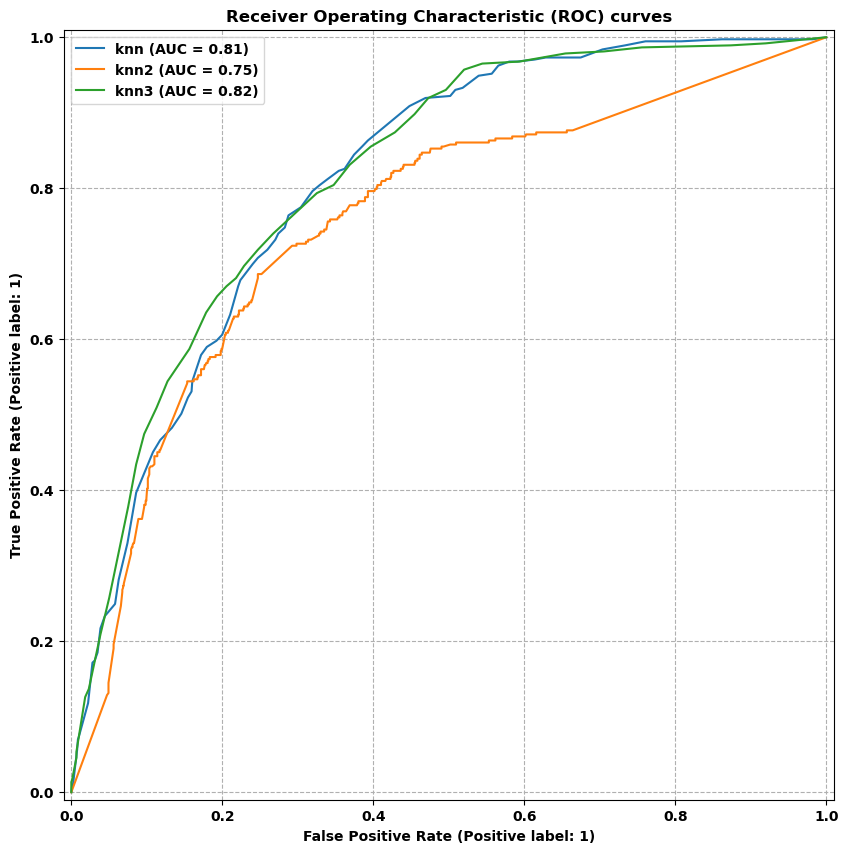

In [94]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

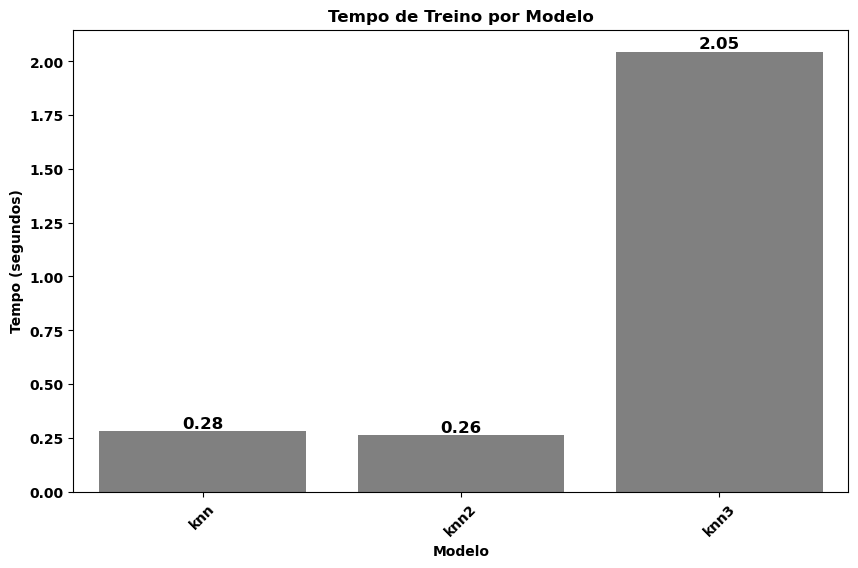

In [95]:
plot_training_time(resource_usage)

In [96]:
knn_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
knn_optimized

('knn3',
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('Classifier', KNeighborsClassifier())]),
 {'Classifier__n_neighbors': [3, 5, 10, 20, 50],
  'Classifier__weights': ['uniform', 'distance'],
  'Classifier__metric': ['euclidean', 'manhattan', 'minkowski']})

## Find best hiperparameters in Regressão Logistica

---

In [107]:
models_and_params = [

    (
        'logit',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', LogisticRegression(random_state = SEED))
        ]),
        {
          "Classifier__C": [0.1, 1, 10, 100],
          "Classifier__penalty": ['l2'],
        }
    )
]

In [108]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: logit...
Modelo logit concluído em 0.29 segundos. ROC AUC: 0.8182



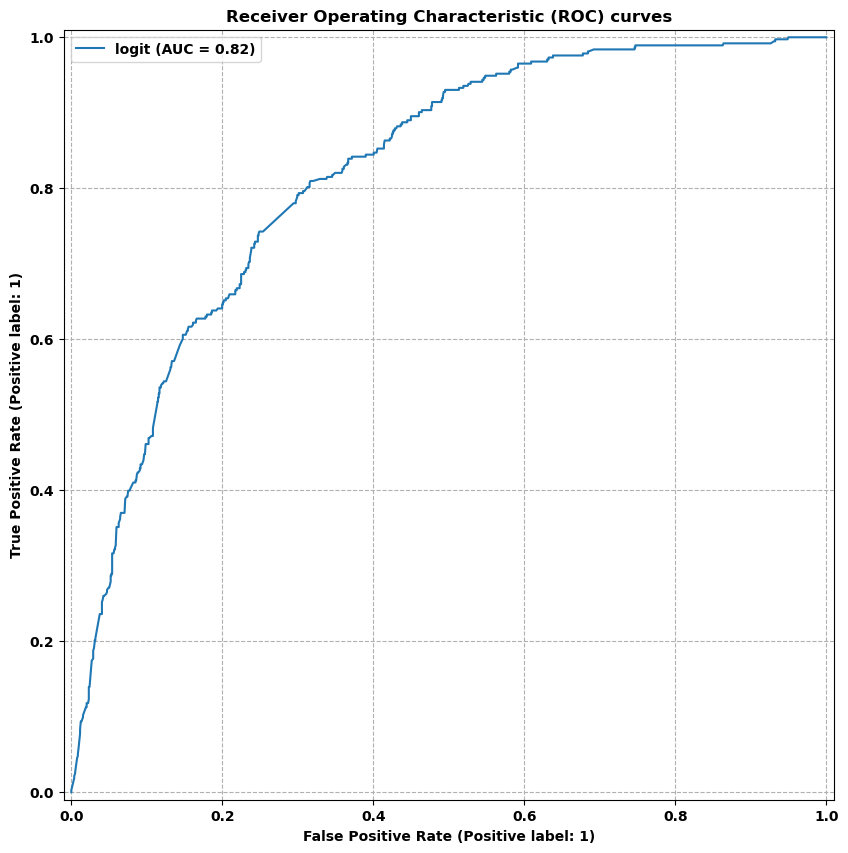

In [109]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

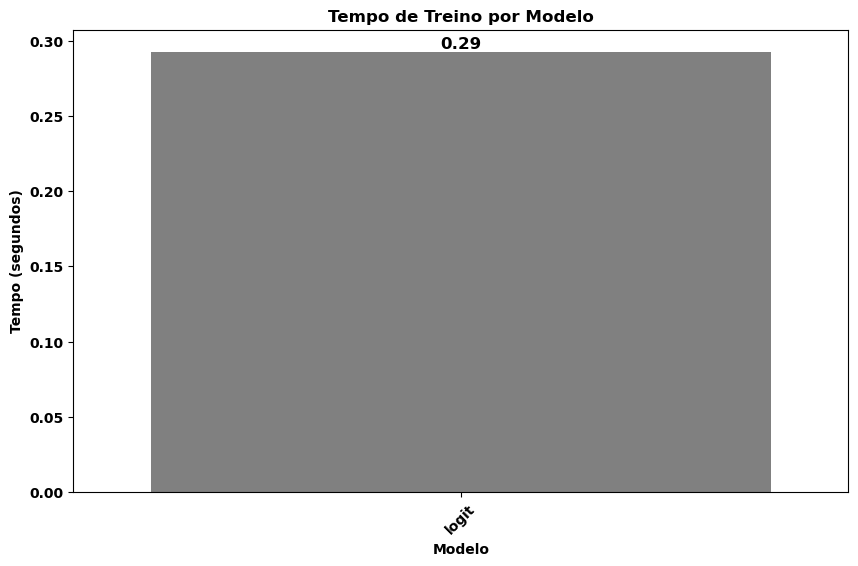

In [110]:
plot_training_time(resource_usage)

In [111]:
logit_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
logit_optimized

('logit',
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('Classifier', LogisticRegression(random_state=42))]),
 {'Classifier__C': [0.1, 1, 10, 100], 'Classifier__penalty': ['l2']})

## Rede Neural Artificial

---

In [101]:
models_and_params = [
    (
        'ann',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', MLPClassifier(random_state=SEED))
        ]),
        {
          "Classifier__hidden_layer_sizes": [(20),(40),(20,40),(40,20),(20,40,60),(60,40,20)],
          "Classifier__max_iter": [100,1000]
        }
    ),
    (
        'ann2',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', MLPClassifier(random_state=SEED))
        ]),
        {
          "Classifier__hidden_layer_sizes": [(20),(40),(20,40),(40,20),(20,40,60),(60,40,20)],
          "Classifier__max_iter": [100,1000],
          "Classifier__solver": ['sgd']
        }
    )
]

In [102]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)


Treinando modelo: ann...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Modelo ann concluído em 108.98 segundos. ROC AUC: 0.8228

Treinando modelo: ann2...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Modelo ann2 concluído em 57.66 segundos. ROC AUC: 0.8167



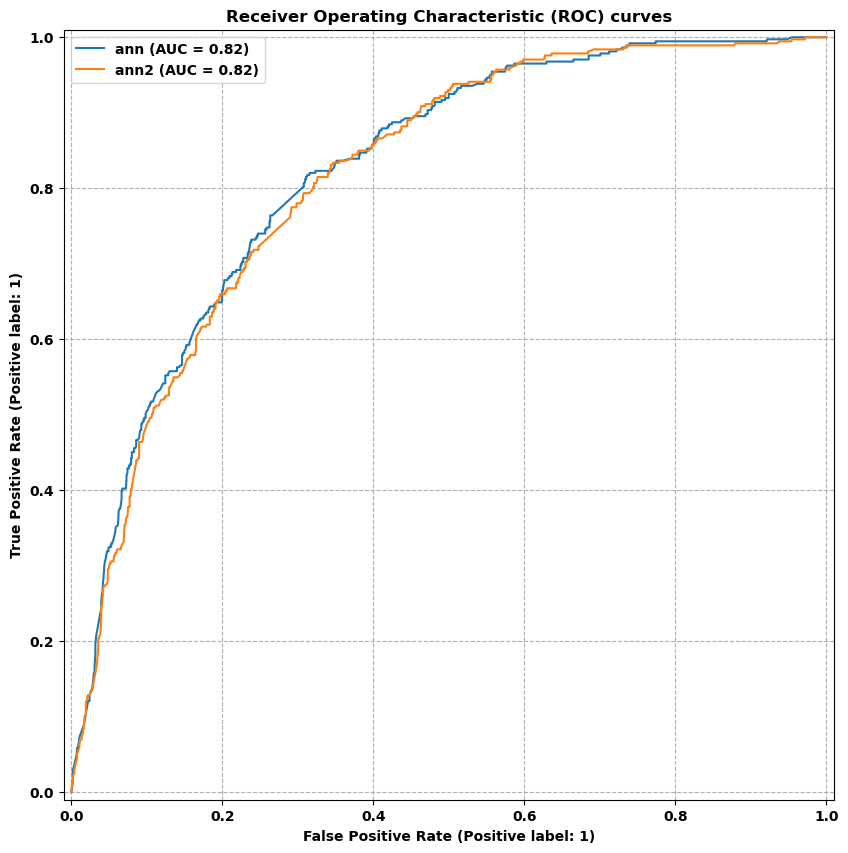

In [103]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

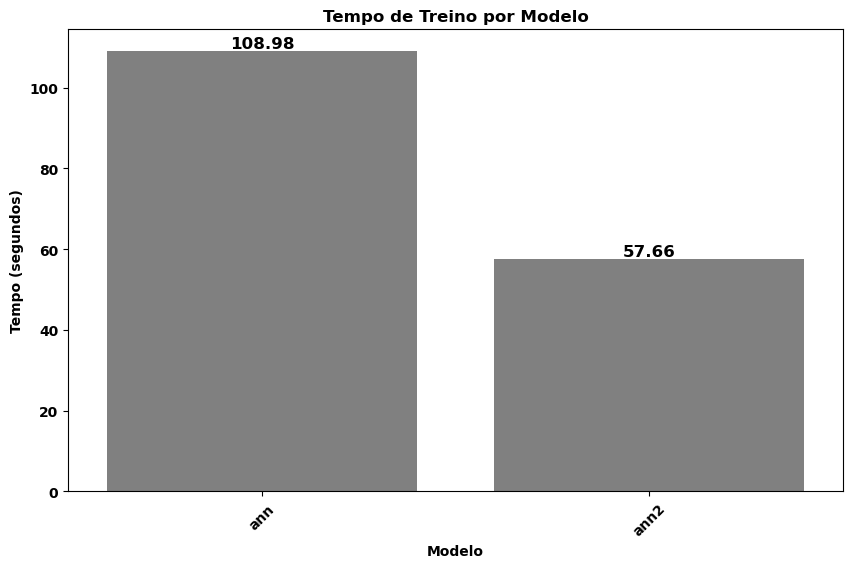

In [104]:
plot_training_time(resource_usage)

In [106]:
ann_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
ann_optimized

('ann',
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('Classifier', MLPClassifier(random_state=42))]),
 {'Classifier__hidden_layer_sizes': [20,
   40,
   (20, 40),
   (40, 20),
   (20, 40, 60),
   (60, 40, 20)],
  'Classifier__max_iter': [100, 1000]})

## Cross Validation entre diferentes Algoritmos

----

In [112]:
models_and_params = [
   ann_optimized,
   random_forest_optimized,
   decision_tree_optimized,
   svm_optimized,
   knn_optimized,
   logit_optimized
]

In [114]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: ann...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Modelo ann concluído em 109.82 segundos. ROC AUC: 0.8228

Treinando modelo: random_forest...
Modelo random_forest concluído em 13.22 segundos. ROC AUC: 0.8368

Treinando modelo: decision_tree...
Modelo decision_tree concluído em 1.68 segundos. ROC AUC: 0.8151

Treinando modelo: svm2...
Modelo svm2 concluído em 3.95 segundos. ROC AUC: 0.7974

Treinando modelo: knn3...
Modelo knn3 concluído em 2.03 segundos. ROC AUC: 0.8173

Treinando modelo: logit...
Modelo logit concluído em 0.22 segundos. ROC AUC: 0.8182



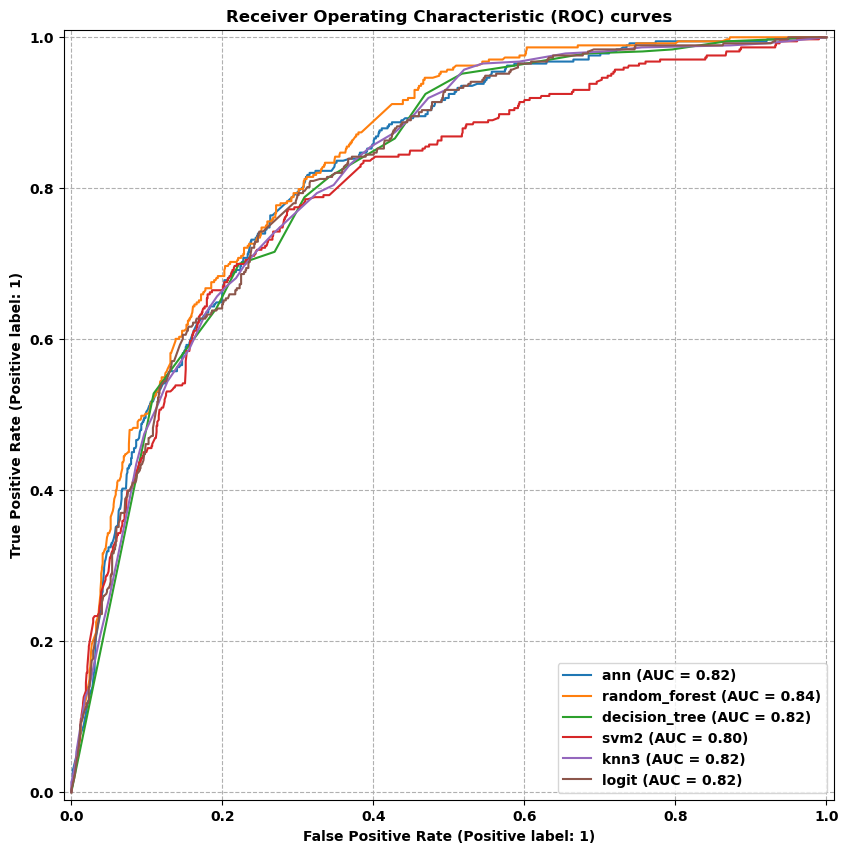

In [115]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

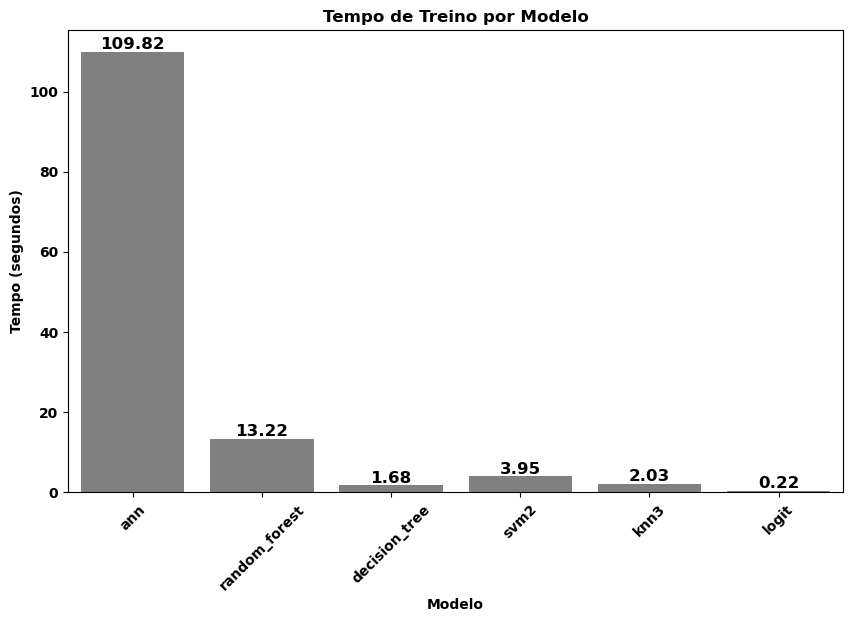

In [116]:
plot_training_time(resource_usage)

## Métricas

---

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Lista para armazenar os resultados de cada modelo
results = []

# Iterar sobre os modelos em grid_search_results
for idx, grid_search in enumerate(grid_search_results):
    best_model = grid_search.best_estimator_  # Melhor modelo encontrado na GridSearchCV

    # Verificar se o modelo é um Pipeline
    if hasattr(best_model, "steps"):
        model_name = type(best_model.steps[-1][1]).__name__
    else:
        model_name = type(best_model).__name__

    # Previsões das classes (necessário para precision, recall, f1)
    y_pred = best_model.predict(X_test)

    # Probabilidades para ROC AUC
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_scores = best_model.decision_function(X_test)
        y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())

    # Calcular métricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Guardar os resultados
    results.append({
        "Modelo": model_name,
        "Precisão": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "ROC AUC": round(roc_auc, 4)
    })

# DataFrame com os resultados
results_df = pd.DataFrame(results)
results_df


,Modelo,Precisão,Recall,F1-Score,ROC AUC
0,MLPClassifier,0.6534,0.4853,0.5569,0.8228
1,RandomForestClassifier,0.6792,0.4826,0.5643,0.8368
2,DecisionTreeClassifier,0.6355,0.5282,0.5769,0.8151
3,SVC,0.6288,0.4450,0.5212,0.7974
4,KNeighborsClassifier,0.6189,0.5094,0.5588,0.8173
5,LogisticRegression,0.6231,0.4477,0.5211,0.8182
